<a href="https://colab.research.google.com/github/dajebbar/AIPND/blob/main/Matplotlib_and_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
pockemon = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AIPND/Matplotlib/data/pokemon.csv')
pockemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [4]:
pockemon.shape

(807, 14)

In [5]:
pockemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               807 non-null    int64  
 1   species          807 non-null    object 
 2   generation_id    807 non-null    int64  
 3   height           807 non-null    float64
 4   weight           807 non-null    float64
 5   base_experience  807 non-null    int64  
 6   type_1           807 non-null    object 
 7   type_2           405 non-null    object 
 8   hp               807 non-null    int64  
 9   attack           807 non-null    int64  
 10  defense          807 non-null    int64  
 11  speed            807 non-null    int64  
 12  special-attack   807 non-null    int64  
 13  special-defense  807 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 88.4+ KB


In [6]:
pockemon['species'] = pockemon.species.astype('category')
pockemon['type_1'] = pockemon.type_1.astype('category')
pockemon['type_2'] = pockemon.type_2.astype('category')

pockemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id               807 non-null    int64   
 1   species          807 non-null    category
 2   generation_id    807 non-null    int64   
 3   height           807 non-null    float64 
 4   weight           807 non-null    float64 
 5   base_experience  807 non-null    int64   
 6   type_1           807 non-null    category
 7   type_2           405 non-null    category
 8   hp               807 non-null    int64   
 9   attack           807 non-null    int64   
 10  defense          807 non-null    int64   
 11  speed            807 non-null    int64   
 12  special-attack   807 non-null    int64   
 13  special-defense  807 non-null    int64   
dtypes: category(3), float64(2), int64(9)
memory usage: 120.5 KB


In [7]:
pockemon.species.nunique()

807

In [8]:
pockemon.type_1.unique()

['grass', 'fire', 'water', 'bug', 'normal', ..., 'ice', 'dragon', 'dark', 'steel', 'flying']
Length: 18
Categories (18, object): ['grass', 'fire', 'water', 'bug', ..., 'dragon', 'dark', 'steel', 'flying']

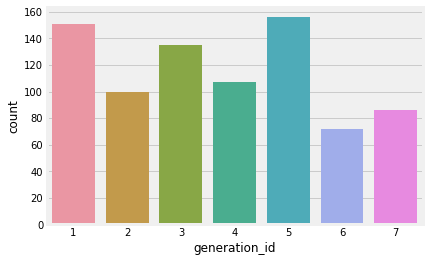

In [9]:
sns.countplot(data=pockemon, x='generation_id');

In [10]:
base_col = sns.color_palette()[0]

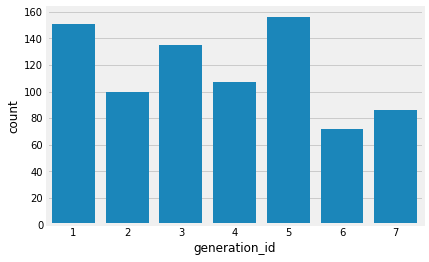

In [11]:
sns.countplot(data=pockemon, x='generation_id', color=base_col);

In [12]:
gen_order = pockemon['generation_id'].value_counts().index
gen_order

Int64Index([5, 1, 3, 4, 2, 7, 6], dtype='int64')

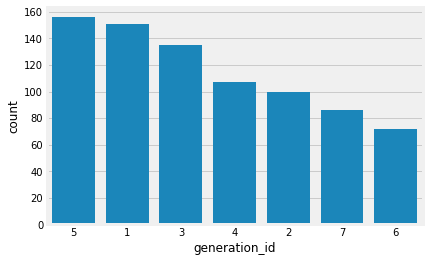

In [13]:
sns.countplot(data=pockemon,
              x='generation_id',
              color=base_col,
              order=gen_order);

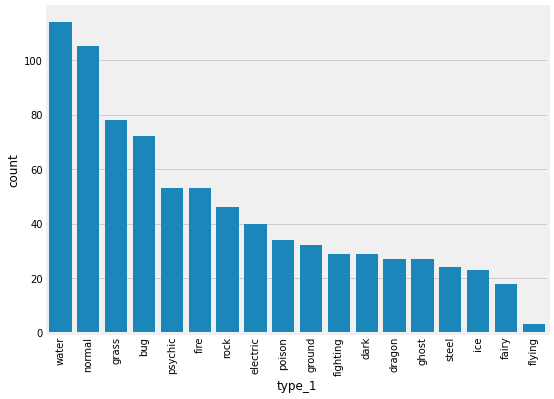

In [14]:
type_order = pockemon['type_1'].value_counts().index

plt.figure(figsize=(8,6))
plt.xticks(rotation=90)
sns.countplot(data=pockemon,
              x='type_1',
              color=base_col,
              order=type_order);


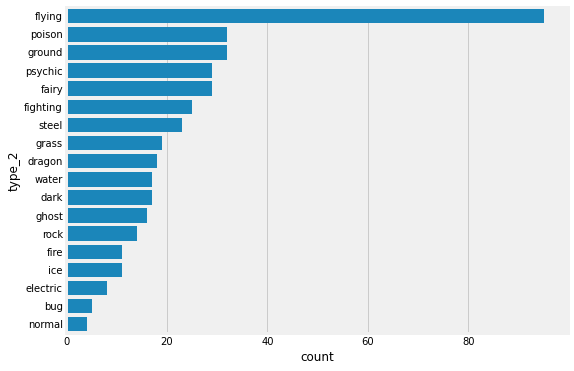

In [15]:
type_order2 = pockemon['type_2'].value_counts().index

plt.figure(figsize=(8,6))
sns.countplot(data=pockemon,
              y='type_2',
              color=base_col,
              order=type_order2);

# Absolute Vs Relative Frequency 

In [16]:
pkmn_types = pockemon.melt(id_vars=['id', 'species'],
                           value_vars=['type_1', 'type_2'],
                           var_name='type_level',
                           value_name='type').dropna()

pkmn_types

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
...,...,...,...,...
1607,801,magearna,type_2,fairy
1608,802,marshadow,type_2,ghost
1610,804,naganadel,type_2,dragon
1611,805,stakataka,type_2,steel


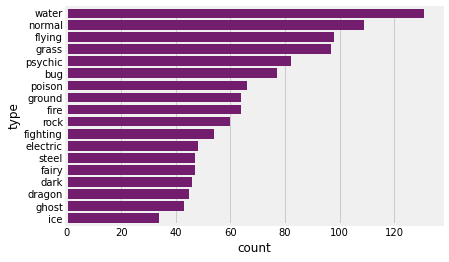

In [17]:
type_count = pkmn_types['type'].value_counts()
type_order = type_count.index
base_color = sns.color_palette()[5]
sns.countplot(data=pkmn_types, y='type', order=type_order, color=base_color);

In [18]:
n_pockemon = pockemon.shape[0]
max_type_cnt = type_count[0]
max_prop = max_type_cnt / n_pockemon
max_prop

0.1623296158612144

In [19]:
ticks_prop = np.arange(0, max_prop, 0.02)
ticks_prop

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16])

In [20]:
tick_names = [f"{v:0.2f}" for v in ticks_prop]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14', '0.16']

Text(0.5, 0, 'proportion')

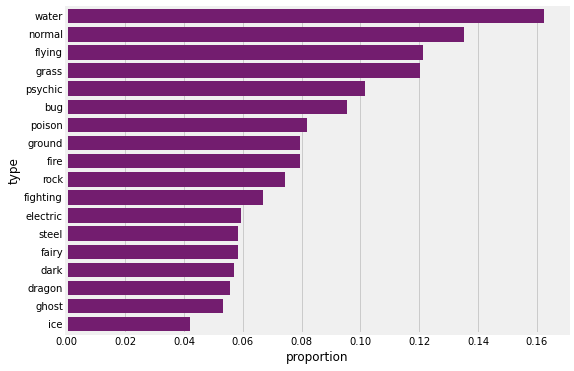

In [21]:
plt.figure(figsize=[8,6])
sns.countplot(data=pkmn_types, y='type', order=type_order, color=base_color)
plt.xticks(n_pockemon * ticks_prop, tick_names)
plt.xlabel('proportion')

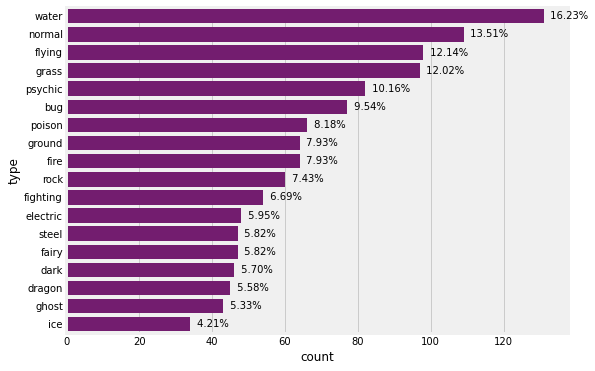

In [22]:
plt.figure(figsize=[8,6])
sns.countplot(data=pkmn_types, y='type', order=type_order, color=base_color)

for i in range(type_count.shape[0]):
  cnt = type_count[i]
  pct_string = f"{100 * cnt/n_pockemon: 0.2f}%"
  plt.text(cnt+1, i, pct_string, va='center')


# Counting Missing Data

In [23]:
pockemon.isna().sum()

id                   0
species              0
generation_id        0
height               0
weight               0
base_experience      0
type_1               0
type_2             402
hp                   0
attack               0
defense              0
speed                0
special-attack       0
special-defense      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

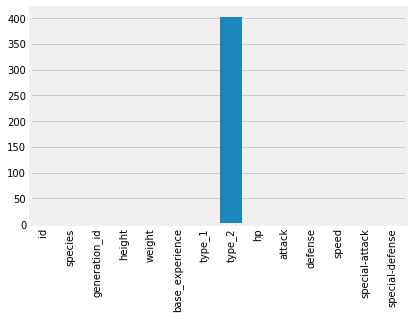

In [24]:
na_cnt = pockemon.isna().sum()

base_color = sns.color_palette()[0]

sns.barplot(na_cnt.index.values, na_cnt, color=base_color);
plt.xticks(rotation=90)

# Pie Charts

(-1.113611536756788,
 1.122668126501173,
 -1.1346305581062308,
 1.1016491051517303)

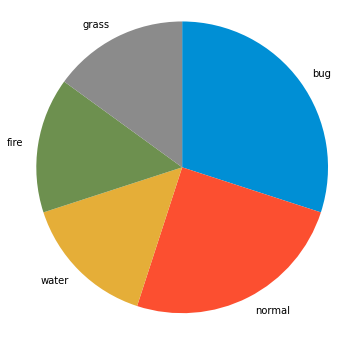

In [25]:
sorted_cnt = pkmn_types.loc[:, 'type'][:20].value_counts()
plt.figure(figsize=(8,6))
plt.pie(sorted_cnt, labels=sorted_cnt.index, startangle=90, counterclock=False);
plt.axis('square')

(-1.113611536756788,
 1.122668126501173,
 -1.1346305581062308,
 1.1016491051517303)

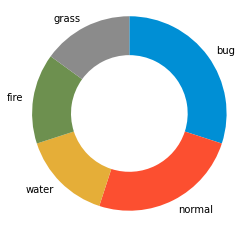

In [26]:
# donnut

plt.pie(sorted_cnt, labels=sorted_cnt.index, startangle=90,
        counterclock=False,
        wedgeprops={'width': 0.4});
plt.axis('square')

# Histograms

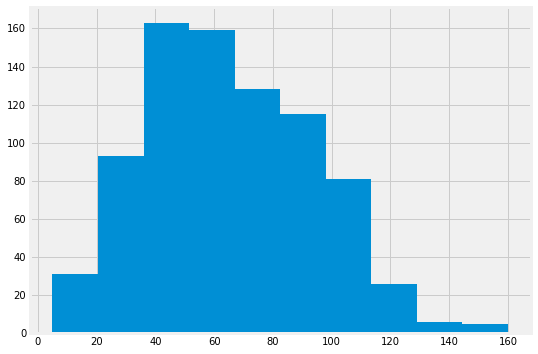

In [27]:
plt.figure(figsize=[8,6])
plt.hist(data=pockemon, x='speed');

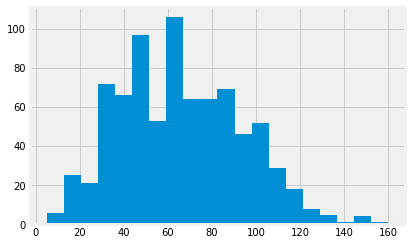

In [28]:
plt.hist(data=pockemon, x='speed', bins=20);

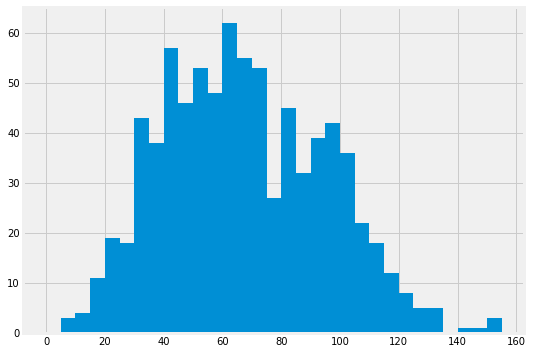

In [29]:
bins = np.arange(0, pockemon['speed'].max(), 5)
plt.figure(figsize=[8,6])
plt.hist(data=pockemon, x='speed', bins=bins);

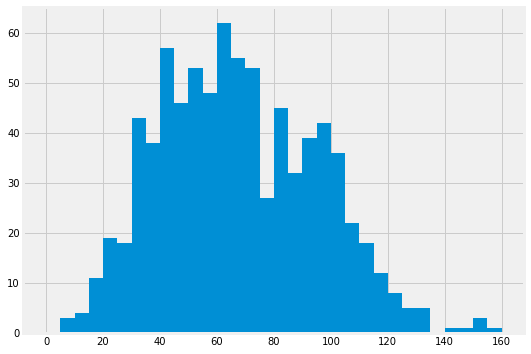

In [30]:
bins = np.arange(0, pockemon['speed'].max()+5, 5)
plt.figure(figsize=[8,6])
plt.hist(data=pockemon, x='speed', bins=bins);

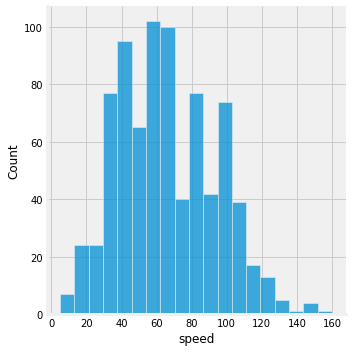

In [31]:
sns.displot(pockemon['speed']);

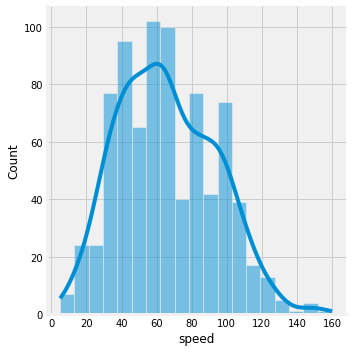

In [32]:
sns.displot(pockemon['speed'], kde=True);

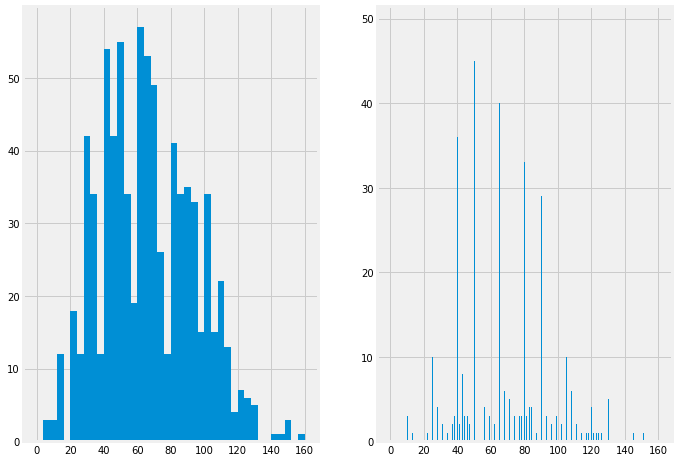

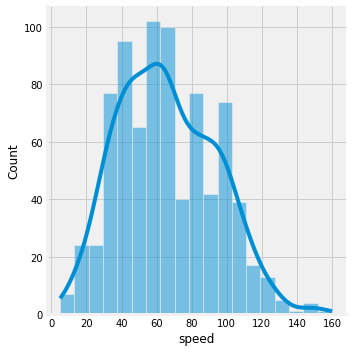

In [33]:
plt.figure(figsize=[16,8])

plt.subplot(1,3,1)
bins = np.arange(0, pockemon['speed'].max()+4, 4)
plt.hist(data=pockemon, x='speed', bins=bins);

plt.subplot(1, 3, 2)
bins = np.arange(0, pockemon['speed'].max()+1/4, 1/4)
plt.hist(data=pockemon, x='speed', bins=bins);

# plt.subplot(1,3,3)
sns.displot(data=pockemon, x='speed', kde=True);

# Figures, Axes, and Subplots

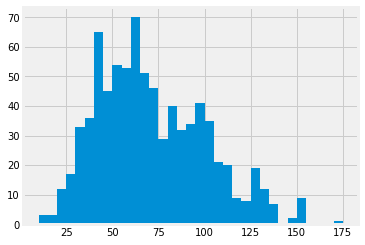

In [34]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])

bins = np.arange(pockemon['special-attack'].min(),
                 pockemon['special-attack'].max()+5, 5)

ax.hist(data=pockemon, x='special-attack', bins=bins);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

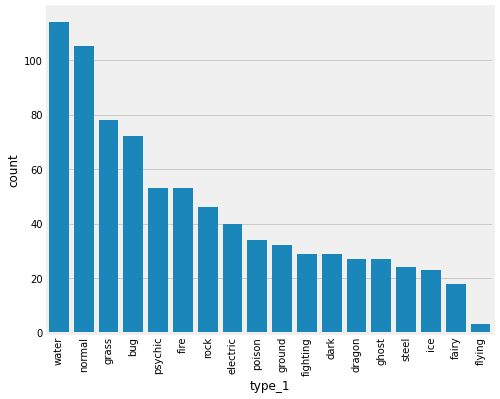

In [35]:
# ax with seaborn

fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([.125, .125, .775, .755])
order_type = pockemon['type_1'].value_counts().index
sns.countplot(data=pockemon, x='type_1', color=base_color, ax=ax, order=order_type);
plt.xticks(rotation=90)

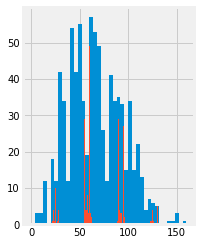

In [36]:
plt.subplot(1,2,1)
bins = np.arange(0, pockemon['speed'].max()+4, 4)
plt.hist(data=pockemon, x='speed', bins=bins);

# plt.subplot(1, 2, 2)
bins = np.arange(0, pockemon['speed'].max()+1/4, 1/4)
plt.hist(data=pockemon, x='speed', bins=bins);


# Choosing a Plot for Discrete Data


# Descriptive Stats Outliers And Axis Limits

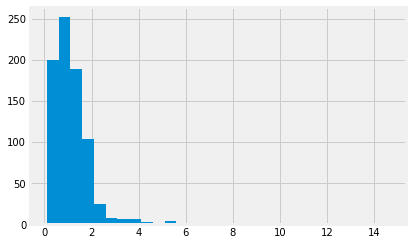

In [37]:
bins = np.arange(pockemon['height'].min(), pockemon['height'].max()+.5, .5)
plt.hist(data=pockemon, x='height', bins=bins);

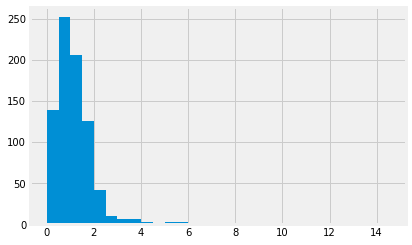

In [38]:
bins = np.arange(0, pockemon['height'].max()+.5, .5)
plt.hist(data=pockemon, x='height', bins=bins);

(0.0, 6.0)

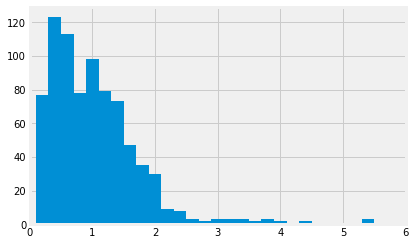

In [39]:
bins = np.arange(pockemon['height'].min(), pockemon['height'].max()+.2, .2)
plt.hist(data=pockemon, x='height', bins=bins);
plt.xlim((0, 6))

# Scales And Transformations

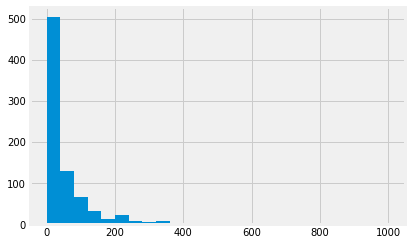

In [40]:
bins = np.arange(0, pockemon['weight'].max()+40, 40)
plt.hist(data=pockemon, x='weight', bins=bins);

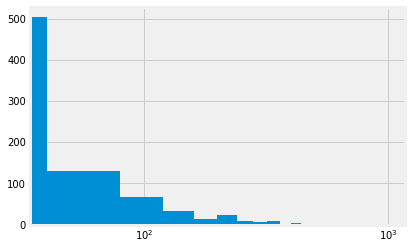

In [41]:
bins = np.arange(0, pockemon['weight'].max()+40, 40)
plt.hist(data=pockemon, x='weight', bins=bins);
plt.xscale('log')

In [42]:
pockemon['weight'].describe()

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

In [43]:
np.log10(pockemon['weight']).describe()

count    807.000000
mean       1.364366
std        0.670968
min       -1.000000
25%        0.954243
50%        1.431364
75%        1.799341
max        2.999957
Name: weight, dtype: float64

([<matplotlib.axis.XTick at 0x7f0526836810>,
 [Text(0, 0, '0.10'),
  Text(0, 0, '0.30'),
  Text(0, 0, '1.00'),
  Text(0, 0, '3.00'),
  Text(0, 0, '10.00'),
  Text(0, 0, '30.00'),
  Text(0, 0, '100.00'),
  Text(0, 0, '300.00'),
  Text(0, 0, '1000.00')])

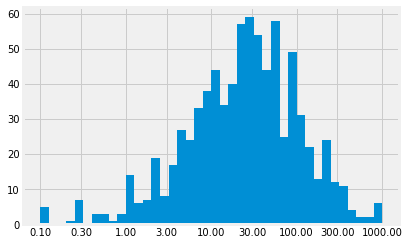

In [44]:
bins = 10 **np.arange(-1, 3 + 0.1, 0.1)
plt.hist(data=pockemon, x='weight', bins=bins);
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = [f"{v:0.2f}" for v in ticks]
plt.xscale('log')
plt.xticks(ticks=ticks, labels=labels)

In [45]:
pockemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


([<matplotlib.axis.XTick at 0x7f051a4e8410>,
 [Text(0, 0, '0.00'),
  Text(0, 0, '0.50'),
  Text(0, 0, '1.00'),
  Text(0, 0, '1.50'),
  Text(0, 0, '2.00'),
  Text(0, 0, '2.50')])

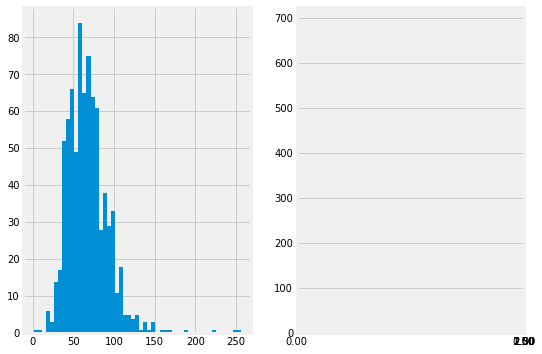

In [46]:
plt.figure(figsize=[8,6])

plt.subplot(1, 2, 1)
bins = np.arange(pockemon['hp'].min(), pockemon['hp'].max()+5, 5)
plt.hist(data=pockemon, x='hp', bins=bins);

plt.subplot(1, 2, 2)
bins = 10 **np.arange(0, 2.45 + 0.5, 0.5)
ticks = [0, 0.5, 1, 1.5, 2, 2.5]
labels = [f"{v:0.2f}" for v in ticks]
plt.hist(data=pockemon, x='hp', bins=bins);
plt.xscale('log')
plt.xticks(ticks, labels)

In [47]:
np.log10(pockemon['attack']).describe()

count    807.000000
mean       1.842731
std        0.197323
min        0.698970
25%        1.740363
50%        1.875061
75%        1.977724
max        2.257679
Name: attack, dtype: float64

In [48]:
pockemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


---
# Matplotlib and Seaborn Part 2
---

# Scatterplots and Correlation

In [49]:
fuel_econ = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AIPND/Matplotlib/data/fuel_econ.csv')

print(fuel_econ.shape)

fuel_econ.head()

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

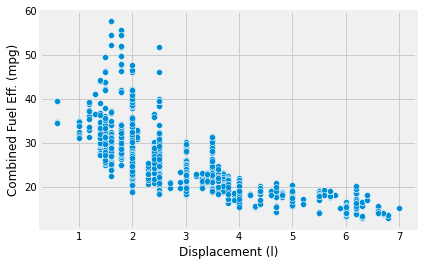

In [50]:
sns.scatterplot(data=fuel_econ, x='displ', y='comb');
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

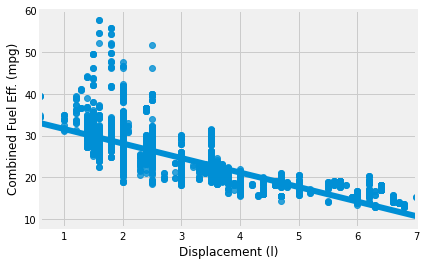

In [51]:
sns.regplot(data=fuel_econ, x='displ', y='comb');
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

In [52]:
def log_trans(x, inverse=False):
  if not inverse:
    return np.log10(x)
  else:
    return np.power(10, x)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


([<matplotlib.axis.YTick at 0x7f0526e8b650>,
 [Text(0, 0, '10'),
  Text(0, 0, '20'),
  Text(0, 0, '50'),
  Text(0, 0, '100'),
  Text(0, 0, '200'),
  Text(0, 0, '500')])

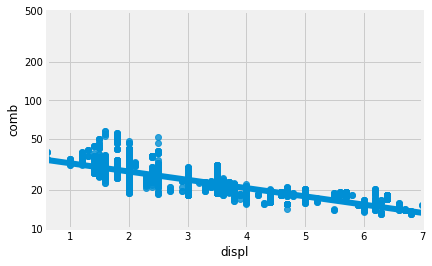

In [53]:
sns.regplot(fuel_econ['displ'], fuel_econ['comb'].apply(log_trans));
tick_locs = [10, 20, 50, 100, 200, 500]
plt.yticks(log_trans(tick_locs), tick_locs)

# Overplotting, Transparency, and Jitter

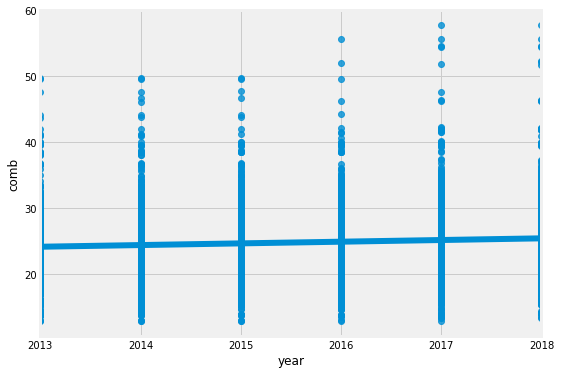

In [54]:
plt.figure(figsize=[8,6])
sns.regplot(data=fuel_econ, x='year', y='comb');

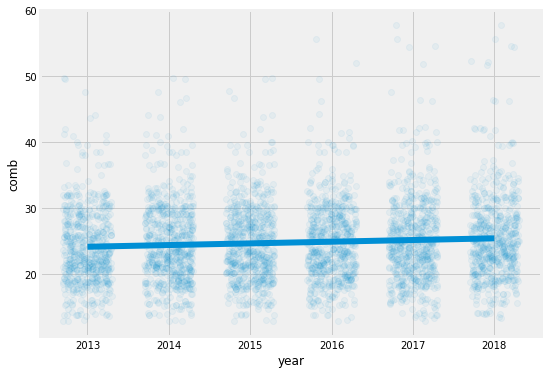

In [55]:
plt.figure(figsize=[8,6])
sns.regplot(data=fuel_econ, x='year', y='comb', x_jitter=0.3, scatter_kws={'alpha': 1/20});

Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

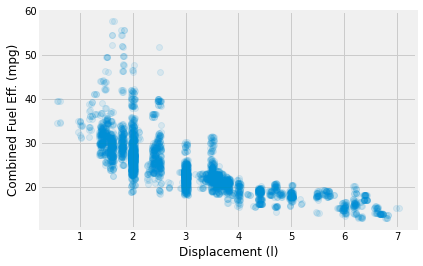

In [56]:
sns.regplot(data=fuel_econ, x='displ', y='comb', x_jitter=.04, scatter_kws={'alpha':1/10}, fit_reg=False);
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

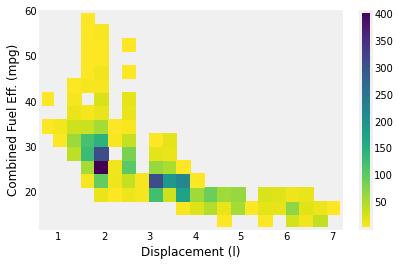

In [57]:
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 60+3, 3)

plt.hist2d(data=fuel_econ, x='displ', y='comb', cmin=0.5,
           cmap='viridis_r', bins=[bins_x, bins_y]);
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

In [58]:
fuel_econ[['displ', 'comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


In [59]:
fuel_econ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         3929 non-null   int64  
 1   make       3929 non-null   object 
 2   model      3929 non-null   object 
 3   year       3929 non-null   int64  
 4   VClass     3929 non-null   object 
 5   drive      3929 non-null   object 
 6   trans      3929 non-null   object 
 7   fuelType   3929 non-null   object 
 8   cylinders  3929 non-null   int64  
 9   displ      3929 non-null   float64
 10  pv2        3929 non-null   int64  
 11  pv4        3929 non-null   int64  
 12  city       3929 non-null   float64
 13  UCity      3929 non-null   float64
 14  highway    3929 non-null   float64
 15  UHighway   3929 non-null   float64
 16  comb       3929 non-null   float64
 17  co2        3929 non-null   int64  
 18  feScore    3929 non-null   int64  
 19  ghgScore   3929 non-null   int64  
dtypes: float

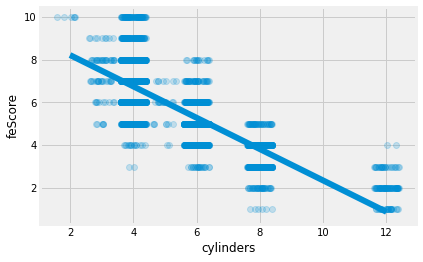

In [60]:
# cylinders, feScore

sns.regplot(data=fuel_econ, x='cylinders', y='feScore', x_jitter=0.4, scatter_kws={'alpha': 1/5});

Text(0, 0.5, 'feScore')

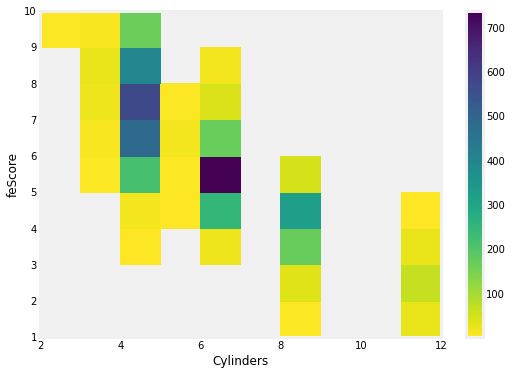

In [61]:
bins_x = np.arange(2, 12+1, 1)
bins_y = np.arange(1, 10+1, 1)

plt.figure(figsize=(8,6))
plt.hist2d(data=fuel_econ, x='cylinders', y='feScore', cmin=0.5,
           bins=[bins_x, bins_y], cmap = 'viridis_r');

plt.colorbar()
plt.xlabel('Cylinders')
plt.ylabel('feScore')

In [62]:
fuel_econ[['cylinders', 'feScore']].describe()

,cylinders,feScore
count,3929.000000,3929.000000
mean,5.468313,5.668872
std,1.878319,1.755860
min,2.000000,1.000000
25%,4.000000,5.000000
50%,5.000000,5.000000
75%,6.000000,7.000000
max,12.000000,10.000000


# Violin Plots

In [63]:
# when we have qualitative variable against quantitative variable

# fuel_econ.info()
fuel_econ['VClass'] = fuel_econ.VClass.astype('category')

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

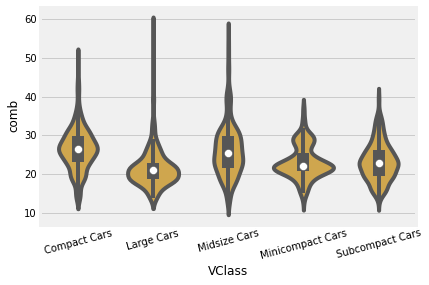

In [64]:
base_color = sns.color_palette()[2]
sns.violinplot(data=fuel_econ, x='VClass', y='comb',
               color= base_color);
plt.xticks(rotation=15)


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

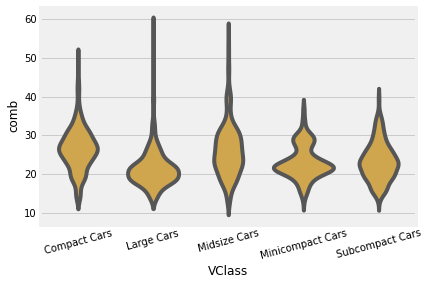

In [65]:
sns.violinplot(data=fuel_econ, x='VClass', y='comb',
               color= base_color, inner=None);
plt.xticks(rotation=15)

# Box Plots

In [66]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

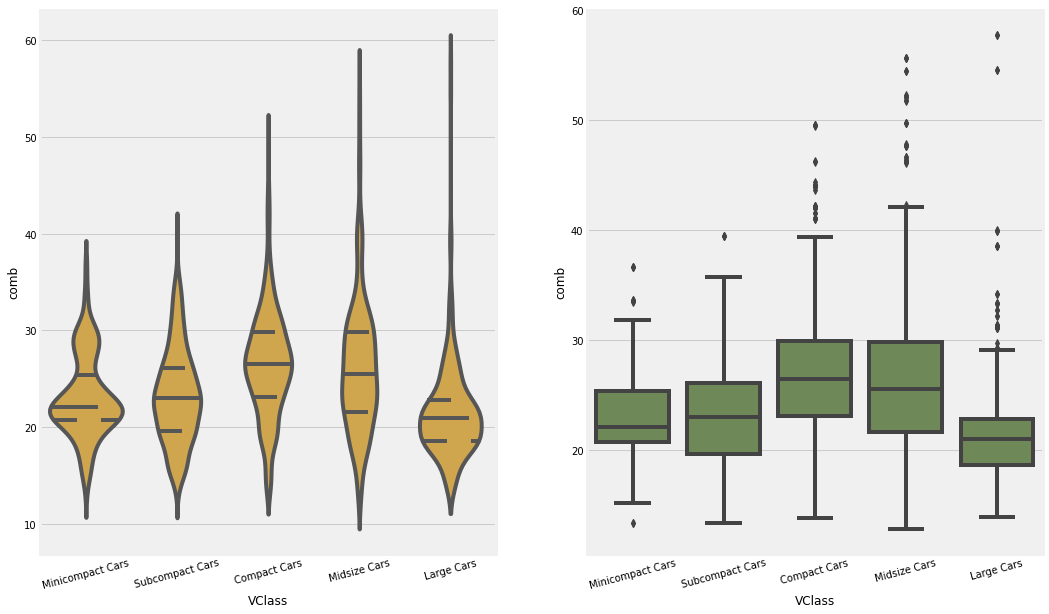

In [67]:
plt.figure(figsize=(16,10))

plt.subplot(1,2,1)
sns.violinplot(data=fuel_econ, x='VClass', y='comb',
               color= base_color, inner='quartile');
plt.xticks(rotation=15)

plt.subplot(1,2,2)
base_color = sns.color_palette()[3]
sns.boxplot(data=fuel_econ, x='VClass', y='comb',
               color= base_color)
plt.xticks(rotation=15)

# Clustered Bar Charts

In [68]:
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])

In [69]:
ct_counts = fuel_econ.groupby(['VClass', 'trans_type']).size()
ct_counts, type(ct_counts)

(VClass            trans_type
 Minicompact Cars  Automatic     188
                   Manual        133
 Subcompact Cars   Automatic     502
                   Manual        171
 Compact Cars      Automatic     784
                   Manual        338
 Midsize Cars      Automatic     989
                   Manual        199
 Large Cars        Automatic     605
                   Manual         20
 dtype: int64, pandas.core.series.Series)

In [70]:
ct_counts.reset_index(name='count')
ct_counts #= ct_counts.pivot(index='VClass', columns='trans_type', values='count')
ct_counts = ct_counts.unstack(level=-1)
ct_counts

trans_type,Automatic,Manual
VClass,,
Minicompact Cars,188,133
Subcompact Cars,502,171
Compact Cars,784,338
Midsize Cars,989,199
Large Cars,605,20


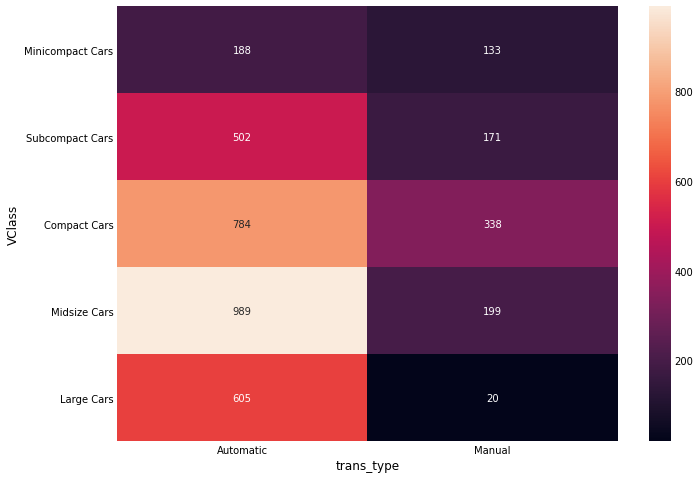

In [71]:
plt.figure(figsize=(10,8))
sns.heatmap(ct_counts, annot=True, fmt='d');

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

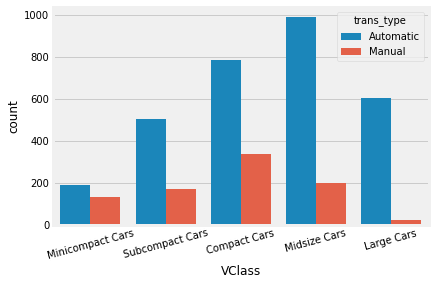

In [72]:
sns.countplot(data=fuel_econ, x='VClass', hue='trans_type')
plt.xticks(rotation=15)

# Faceting

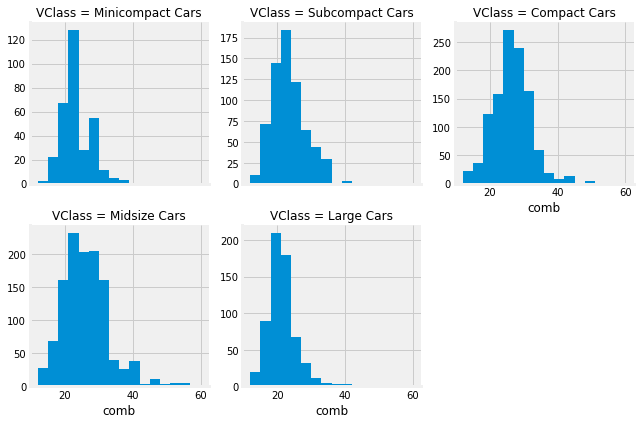

In [86]:
bins = np.arange(12, 60+3, 3)
g = sns.FacetGrid(data=fuel_econ, col='VClass', col_wrap=3, sharey=False);
g.map(plt.hist, 'comb', bins=bins);

In [93]:
group_mean = fuel_econ.groupby(['model']).mean()
group_order = group_mean.sort_values(['comb'], ascending=False).index
group_order

Index(['Ioniq Blue', 'Prius Eco', 'Ioniq', 'Prius Prime',
       'Ioniq Plug-in Hybrid', 'Prius', 'Prius Plug-in Hybrid', 'Prius c',
       'Accord Hybrid', 'Malibu Hybrid',
       ...
       'Phantom EWB', 'Phantom Coupe', 'Phantom Drophead Coupe',
       'Continental Supersports Convertible', 'Continental Supersports',
       'Continental Flying Spur', 'GTC4Lusso', 'Mulsanne', 'FF',
       'Mulsanne EWB'],
      dtype='object', name='model', length=769)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


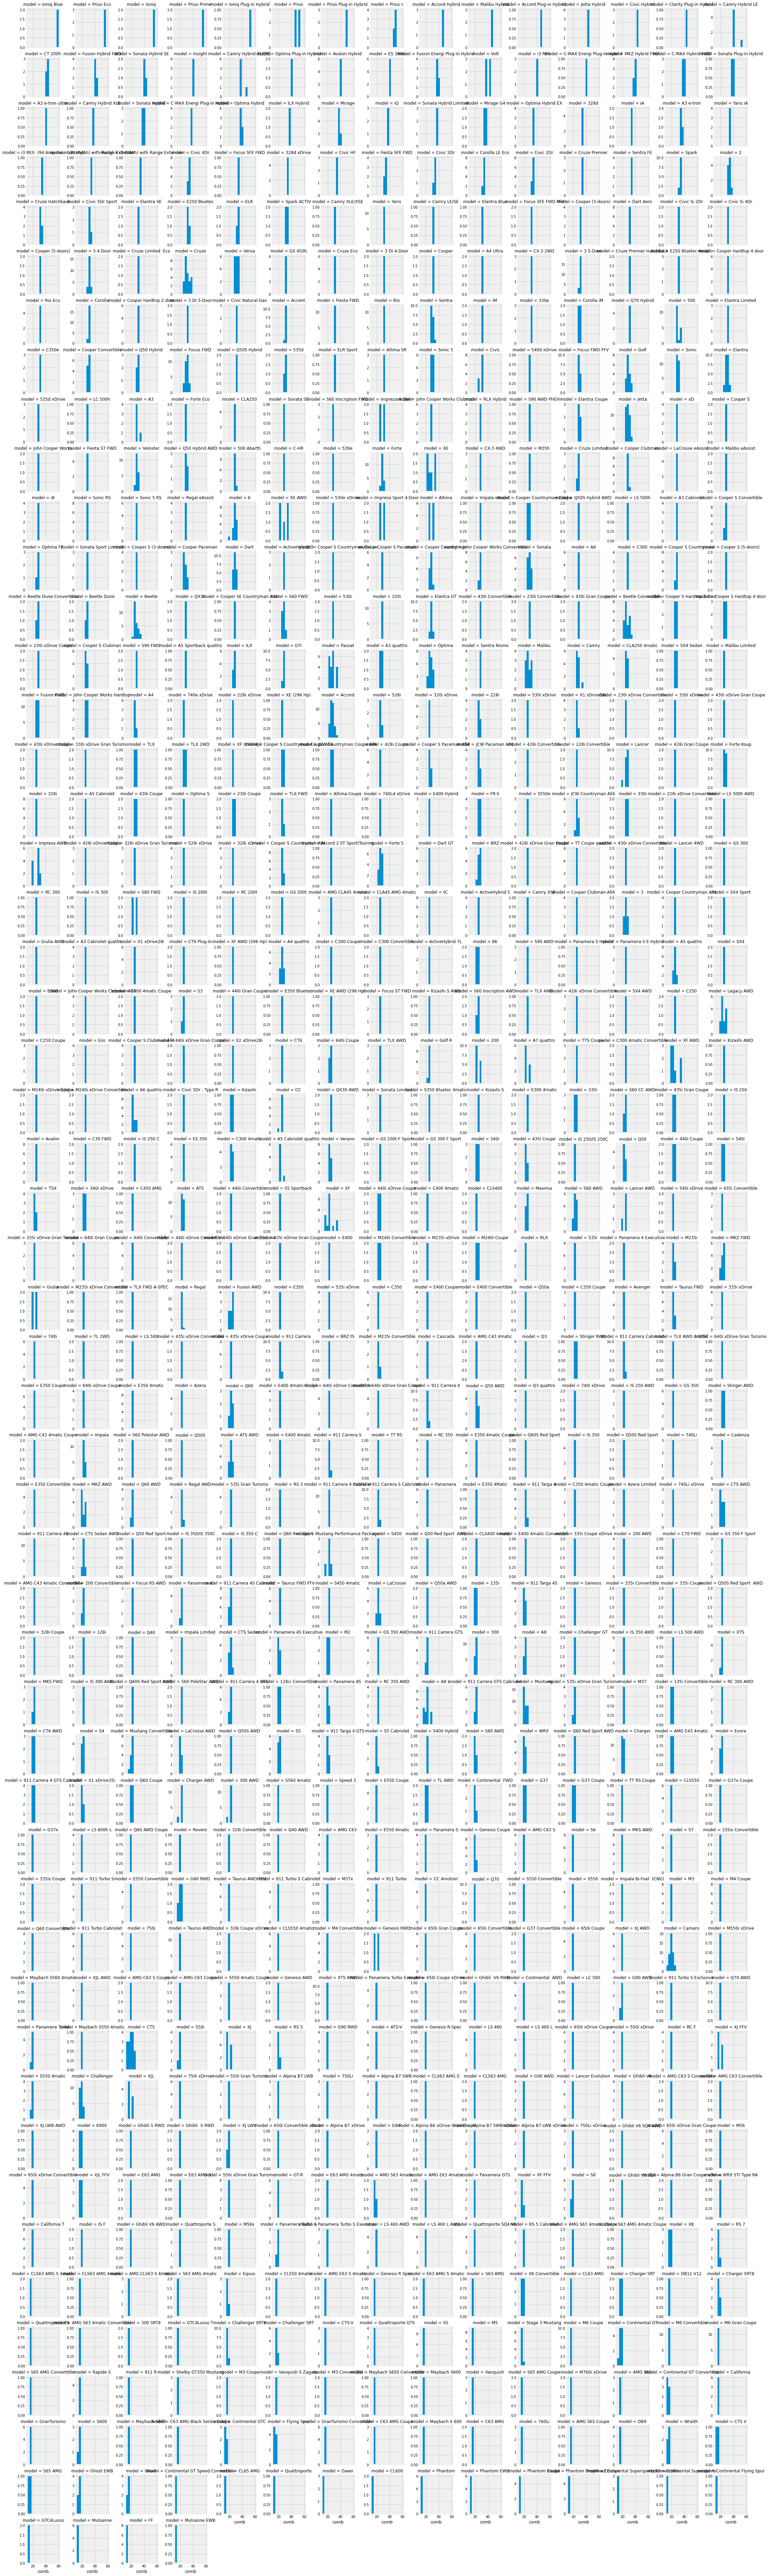

In [95]:
g = sns.FacetGrid(data=fuel_econ, col='model', col_wrap=15, sharey=False,
                  col_order=group_order, height=2);

g.map(plt.hist, 'comb', bins=bins)

# Adaptation of Univariate Plots

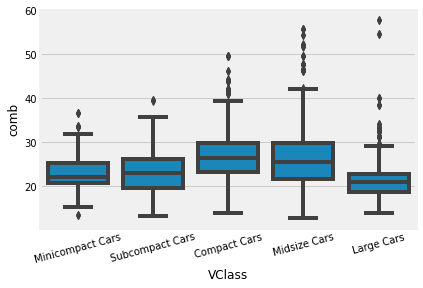

In [96]:
base_color = sns.color_palette()[0]
sns.boxplot(data=fuel_econ, x='VClass', y='comb', color=base_color);
plt.xticks(rotation=15);

Text(0, 0.5, 'Avg. Combined Fuel Eff. (mpg)')

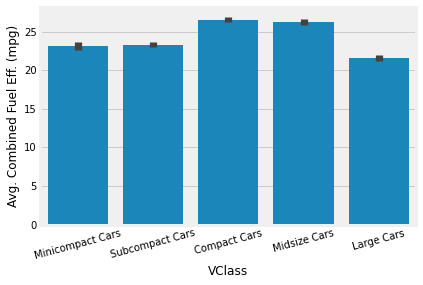

In [97]:
base_color = sns.color_palette()[0]
sns.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color);
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Eff. (mpg)')

Text(0, 0.5, 'Avg. Combined Fuel Eff. (mpg)')

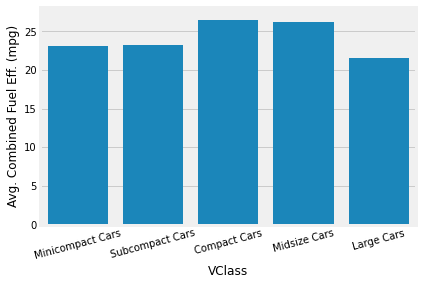

In [98]:
base_color = sns.color_palette()[0]
sns.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color,
            errwidth=0);
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Eff. (mpg)')

Text(0, 0.5, 'Avg. Combined Fuel Eff. (mpg)')

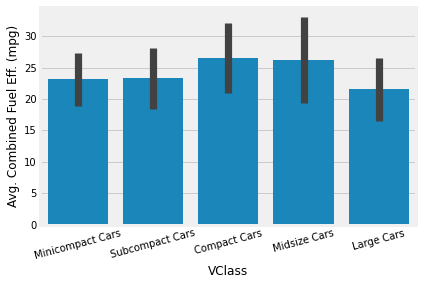

In [99]:
base_color = sns.color_palette()[0]
sns.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color,
            ci='sd');
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Eff. (mpg)')

Text(0, 0.5, 'Avg. Combined Fuel Eff. (mpg)')

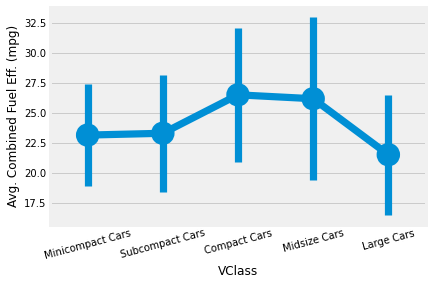

In [101]:
sns.pointplot(data=fuel_econ, x='VClass', y='comb',
            ci='sd');
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Eff. (mpg)')            

Text(0, 0.5, 'Avg. Combined Fuel Eff. (mpg)')

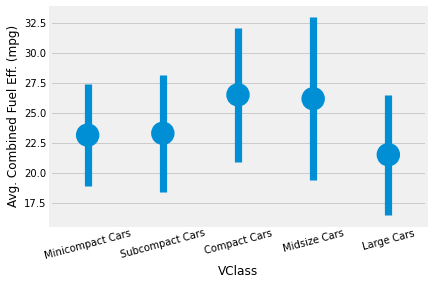

In [102]:
sns.pointplot(data=fuel_econ, x='VClass', y='comb',
            ci='sd', linestyles='');
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Eff. (mpg)')  